<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
#Aquí estoy ignorando las alertas de las actualizaciones futuras de las librerias
#que para efectos practicos de este laboratorio no serán necesarias
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [4]:
#veamos los tipos de variables y los vacios en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


Hay tres columnas con valores vacios, desplazamiento, cilindros y tamano_motor_tipo. Las dos primeras tienen valores numéricos, por lo que simplemente se rellenaran con el promedio (sin redondear para no alterar los datos), en cuanto a la columna tamano_motor_tipo se rellenará con la moda, pues tiene valores de string.

In [5]:
#Reemplazamos como dijimos
df['desplazamiento'] = df['desplazamiento'].fillna(df['desplazamiento'].mean())
df['cilindros'] = df['cilindros'].fillna(df['cilindros'].mean())
df['tamano_motor_tipo'] = df['tamano_motor_tipo'].fillna(df['tamano_motor_tipo'].mode()[0])

#Revisamos los datos nuevamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36791 non-null  float64
 2   cilindros             36791 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36791 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [6]:
#Separamos en dataframes que contengan variables numericas y categoricas
df_num = df[['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']]
df_cat = df.drop(df_num.columns, axis = 1)
df_num = df[['desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']]  #quitamos los años

#normalizamiento
scaler = MinMaxScaler()
scaler.fit(df_num)

#transformamos para variables numericas
new_df = scaler.transform(df_num)
ndf_num = pd.DataFrame(new_df, columns= df_num.columns)

Al pasar de variables categoricas a numericas no las normalizaremos, pues es más sencillo visualizarlas así además de que no será necesario tenerlas de esa forma.

In [7]:
#trasformamos las variables categoricas a variables numericas e imprimimos el criterio
df_cat2 = df_cat
print('Metodo de Clasificacion:')
for col in df_cat.columns:
  print(f'\n Para la columna {col}:')
  ndf_cat = pd.get_dummies(df_cat[col])
  i = 0
  for subcol in ndf_cat.columns:
    print("{:<30} \t = {:<5}".format(subcol, i))
    i += 1

  for fil in range(len(df_cat)):
    df_cat2.iloc[fil][col]= list(ndf_cat.iloc[fil]).index(1)

Metodo de Clasificacion:

 Para la columna clase_tipo:
Camionetas                     	 = 0    
Coche Familiar                 	 = 1    
Coches Grandes                 	 = 2    
Coches Medianos                	 = 3    
Coches pequeños                	 = 4    
Deportivos                     	 = 5    
Furgoneta                      	 = 6    
Vehículos Especiales           	 = 7    

 Para la columna traccion_tipo:
cuatro                         	 = 0    
dos                            	 = 1    

 Para la columna transmision_tipo:
Automatica                     	 = 0    
Manual                         	 = 1    

 Para la columna combustible_tipo:
Hibrido                        	 = 0    
Normal                         	 = 1    
Otros tipos de combustible     	 = 2    
Premium                        	 = 3    

 Para la columna tamano_motor_tipo:
grande                         	 = 0    
mediano                        	 = 1    
muy grande                     	 = 2    
muy pequeño             

In [8]:
#Dataframe de las variables categoricas pasado a variables numericas bajo el criterio impreso anteriormente
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,7,1,0,1,4,0,0
1,7,1,0,1,0,3,3
2,7,1,0,1,4,0,0
3,7,1,0,1,0,3,3
4,3,1,0,3,0,0,0


In [9]:
#concatenamos dataframes
df_procesado = pd.concat([df['year'], ndf_num, df_cat], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,1984,0.243590,0.142857,0.398014,0.331027,7,1,0,1,4,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,7,1,0,1,0,3,3
2,1985,0.243590,0.142857,0.424351,0.360294,7,1,0,1,4,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,7,1,0,1,0,3,3
4,1987,0.410256,0.285714,0.424351,0.360294,3,1,0,3,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [10]:
X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=df_procesado.columns[:-1])
centroids_df.insert(0, "cluster", [1,2,3,4,5,6,7,8])
print('Centroides para cada Cluster: \n')
centroids_df.head(8)


Centroides para cada Cluster: 



,cluster,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,1,1986.630087,0.305982,0.232156,0.363334,0.289640,4.733655,0.869431,0.463259,1.229508,2.449759,2.281196,2.294696
1,2,2008.887806,0.392991,0.299679,0.361822,0.290549,3.442340,0.647600,0.235056,1.888174,1.658267,1.927901,1.921096
2,3,1993.192538,0.336581,0.257424,0.372931,0.301764,3.513158,0.808628,0.390240,1.442039,2.106929,2.064457,2.094437
3,4,2014.473495,0.258619,0.207265,0.272777,0.193921,3.658752,0.763114,0.246549,1.796521,2.942297,3.837383,3.766703
4,5,2004.078468,0.359461,0.283193,0.371587,0.301824,3.422940,0.694199,0.298292,1.786934,1.758964,1.920030,1.914398
5,6,1999.081367,0.336583,0.265434,0.365998,0.295446,3.499508,0.776057,0.336037,1.510324,1.931170,1.976401,1.975418
6,7,2014.643293,0.406015,0.312485,0.342207,0.269158,3.640850,0.533594,0.128512,2.124603,1.130711,1.313706,1.307598
7,8,1987.068740,0.396550,0.277835,0.401246,0.329101,0.409165,0.713912,0.476596,1.114566,2.085106,2.080851,2.108347


In [11]:
#Las Medias y Modas para cada Cluster
grupo = df_procesado.groupby('cluster')
for i, k in grupo:
  print(f'Para Cluster {i+1}:')
  print('\t \t \t   Media      Moda')

  for cate in df_procesado.columns[:5]:
    print("{:>20}: {:>10}{:>10}".format(cate, round(k[cate].mean(), 2), round(k[cate].mode()[0], 2)))
  print('\n')

Para Cluster 1:
	 	 	   Media      Moda
                year:    1986.62      1985
      desplazamiento:       0.31      0.24
           cilindros:       0.23      0.14
                 co2:       0.36      0.37
consumo_litros_milla:       0.29      0.31


Para Cluster 2:
	 	 	   Media      Moda
                year:    2008.89      2008
      desplazamiento:       0.39      0.31
           cilindros:        0.3      0.29
                 co2:       0.36      0.33
consumo_litros_milla:       0.29      0.26


Para Cluster 3:
	 	 	   Media      Moda
                year:    1993.18      1992
      desplazamiento:       0.34      0.31
           cilindros:       0.26      0.14
                 co2:       0.37      0.37
consumo_litros_milla:        0.3      0.31


Para Cluster 4:
	 	 	   Media      Moda
                year:    2014.47      2017
      desplazamiento:       0.26      0.18
           cilindros:       0.21      0.14
                 co2:       0.27      0.28
consumo_litros_mi

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [12]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters':Nc,'Score':score})
df_Elbow.head()

,Number of Clusters,Score
0,5,641445.288406
1,10,383972.995209
2,20,279836.621643
3,30,222977.797180
4,50,171596.163151


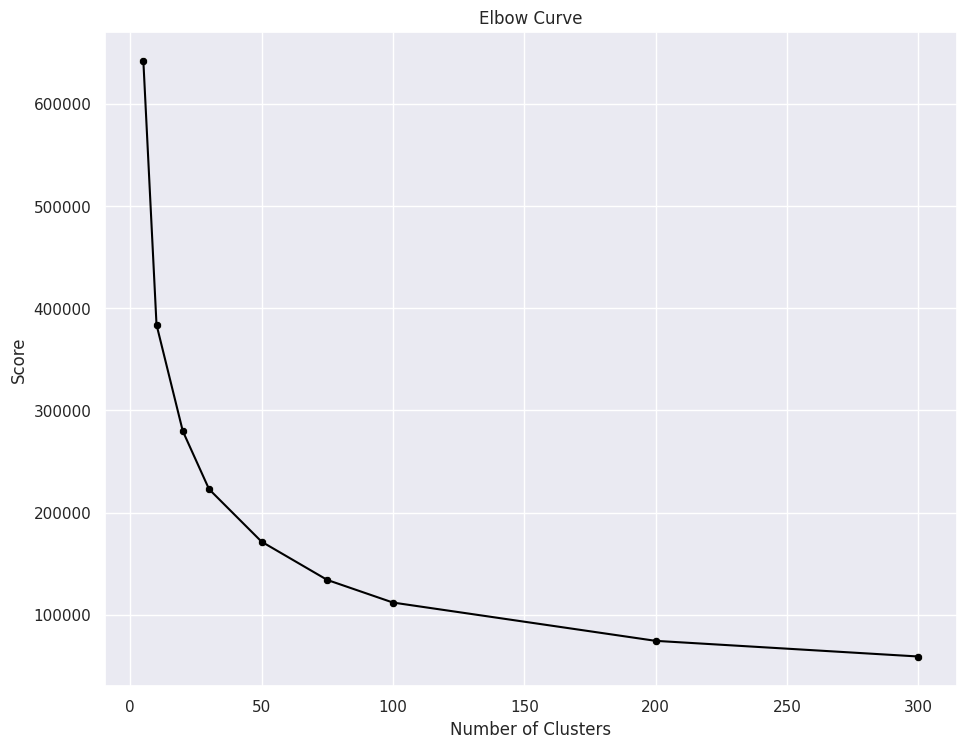

In [13]:
# graficamos los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
             color = 'black',
            data=df_Elbow)

sns.scatterplot(x="Number of Clusters",
             y="Score",
             color = 'black',
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

**CONCLUSIÓN:** El Score de 5 a 10 Cluster cambia abructamente, al igual que de 10 a 20, luego de esto el cambio es menos significativo, por lo que se puede concluir que una buena cantidad de Clusters para este caso es al rededor de 20.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [15]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

En ambos casos disminuiremos a dos dimensiones para poder visualizar en un grafico los diferentes clusters

#PCA

In [16]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris[features])

#Crear un Data Frame de los resutados del PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = iris[target]

pca_df.head()

,PC1,PC2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [17]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      150 non-null    float64
 1   PC2      150 non-null    float64
 2   species  150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


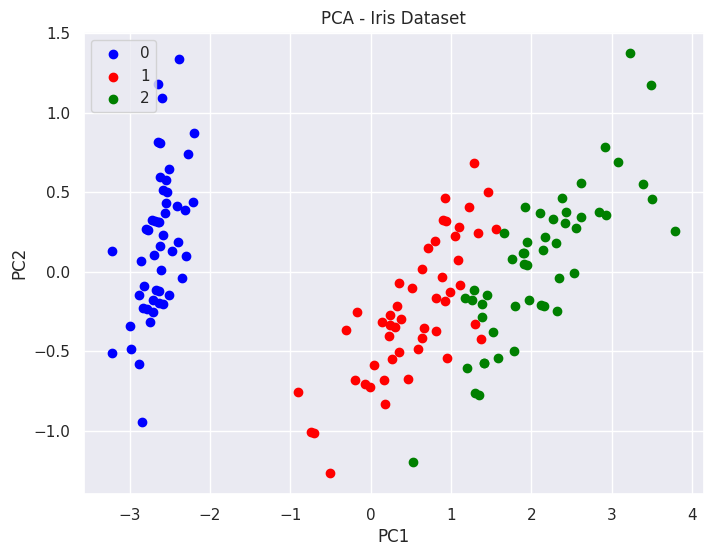

In [18]:
#Gráfico de los resultados de PCA
plt.figure(figsize=(8,6))
targets = [0, 1, 2]
colors = ['blue', 'red', 'green']
for target, color in zip(targets, colors):
  indices = pca_df['species'] == target
  plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c = color, label = target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()

En este caso se puede observar que los diferencias en los datos son bastante notorias, es decir, es posible seperar los datos de forma significativa mediante este método.

#TSNE

In [19]:
target = 'species'
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(iris[features])

#Crear un DataFrame con los resultados
tsne_df = pd.DataFrame(data = tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['species'] = iris[target].copy()
tsne_df.head()

,Dim1,Dim2,species
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0


In [20]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dim1     150 non-null    float32
 1   Dim2     150 non-null    float32
 2   species  150 non-null    int64  
dtypes: float32(2), int64(1)
memory usage: 2.5 KB


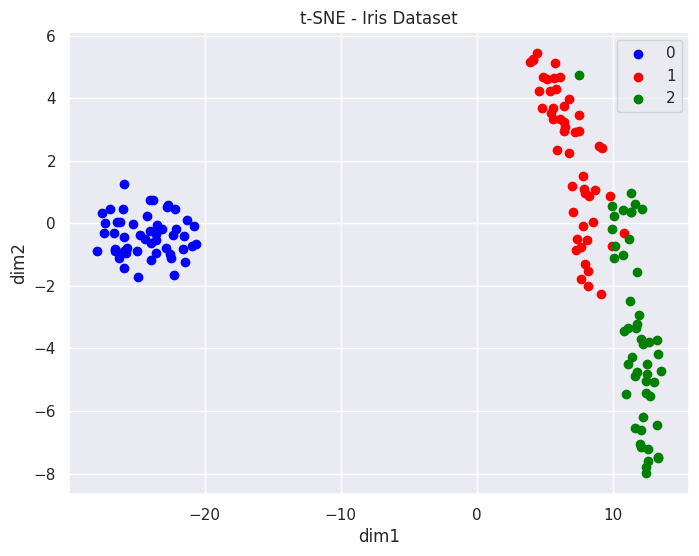

In [21]:
#Gráfico de los resultados de tsne
plt.figure(figsize=(8,6))
for target, color in zip(targets, colors):
  indices = tsne_df['species'] == target
  plt.scatter(tsne_df.loc[indices, 'Dim1'], tsne_df.loc[indices, 'Dim2'], c = color, label = target)
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('t-SNE - Iris Dataset')
plt.legend()
plt.show()

En este caso tambien se nota una diferencia entre las especies, aunque con el método anterior las diferencias entre la esecie 1 y 2 son mas notorias gráficamente, pues aquí existen muchos puntos que se solapan y visualmente se cruzan.

**Conclusión:** Particularmente para este conjnto de datos resulta más adecuado utilizar el método PCA para reducir la dimensión del DataFrame, pues los puntos vistos en cada gráfico son notoriamente más diferenciables que en el segundo método.